# Гришин Андрей Валерьевич, ИКБО-11-22.
## Практическая работа 6

# Задание 1
Найти данные для кластеризации. Данные в группе не должны
повторяться. Если признаки в данных имеют очень сильно разные
масштабы, то необходимо данные предварительно нормализовать.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/selva86/datasets/master/Zoo.csv"
data = pd.read_csv(url)

X = data.drop(columns=["type"])
X = X.drop_duplicates().reset_index(drop=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Задание 2
Провести кластеризацию данных с помощью алгоритма k-means.
Использовать «правило локтя» и коэффициент силуэта для поиска
оптимального количества кластеров

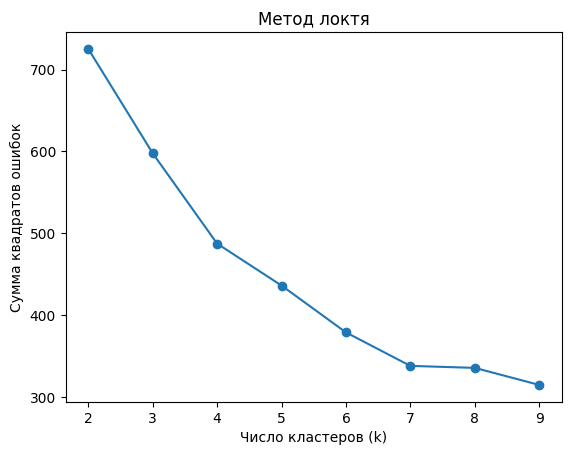

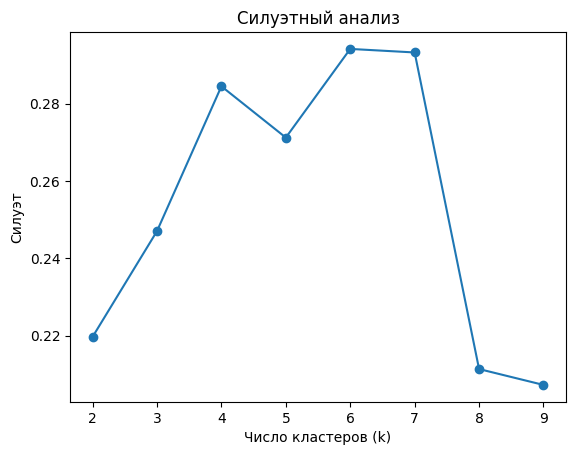

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Метод локтя
vals1 = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    vals1.append(km.inertia_)

plt.plot(range(2, 10), vals1, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Сумма квадратов ошибок')
plt.title('Метод локтя')
plt.show()

# Силуэт
vals2 = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km_labels = km.fit_predict(X_scaled)
    vals2.append(silhouette_score(X_scaled, km_labels))

plt.plot(range(2, 10), vals2, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Силуэт')
plt.title('Силуэтный анализ')
plt.show()

# Задание 3
Провести кластеризацию данных с помощью алгоритма иерархической
кластеризации.

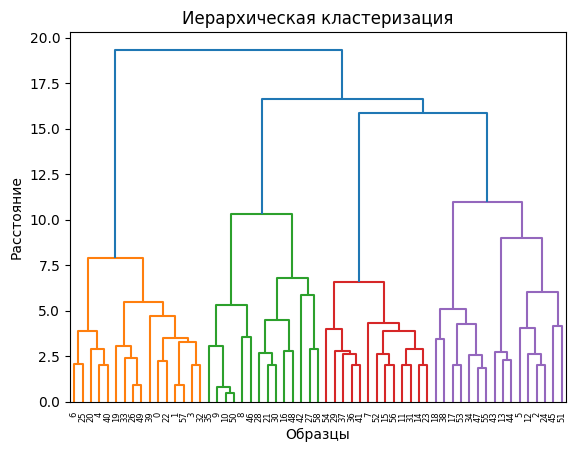

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

link_mat = linkage(X_scaled, method='ward')
dendrogram(link_mat)
plt.title("Иерархическая кластеризация")
plt.xlabel("Образцы")
plt.ylabel("Расстояние")
plt.show()

hc_groups = fcluster(link_mat, t=3, criterion='maxclust')

# Задание 4
Провести кластеризацию данных с помощью алгоритма DBSCAN.

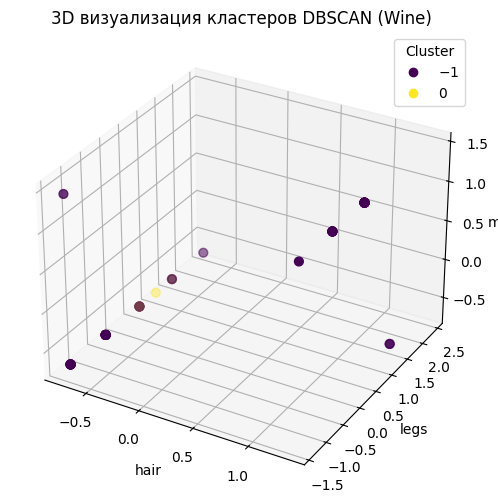

In [4]:
from sklearn.cluster import DBSCAN

view_cols = ['hair', 'legs', 'milk']

db_model = DBSCAN(eps=0.7, min_samples=2)
db_groups = db_model.fit_predict(X_scaled)

plot_df = pd.DataFrame(X_scaled, columns=X.columns)[view_cols].copy()
plot_df['cluster'] = db_groups

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    plot_df[view_cols[0]],
    plot_df[view_cols[1]],
    plot_df[view_cols[2]],
    c=plot_df['cluster'],
    s=40
)

ax.set_xlabel(view_cols[0])
ax.set_ylabel(view_cols[1])
ax.set_zlabel(view_cols[2])
ax.set_title('3D визуализация кластеров DBSCAN (Wine)')

plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


# Задание 5
Визуализировать кластеризованные данные с помощью t-SNE или
UMAP, если необходимо. Если данные трехмерные, то можно
использовать трехмерный точечный график.

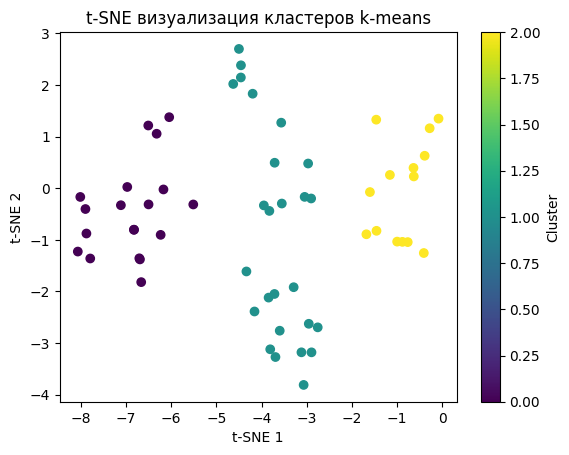

In [5]:
from sklearn.manifold import TSNE

km_model = KMeans(n_clusters=3, random_state=42)
km_groups = km_model.fit_predict(X_scaled)

tsne_model = TSNE(n_components=2, random_state=42)
tsne_emb = tsne_model.fit_transform(X_scaled)

plt.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=km_groups)
plt.title('t-SNE визуализация кластеров k-means')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()
